In [2]:
import sys
sys.path += ['layers']
import numpy as np
from init_model import init_model
from data_utils import get_CIFAR10_data
import pickle
import matplotlib.pyplot as plt

from init_base_model import init_base_model
from train_custom import train_custom

%load_ext autoreload
%autoreload 2

### Load Data & Partition

In [3]:
X_train, y_train, X_test, y_test = get_CIFAR10_data()

### TRAIN DATA TINY
n_train = 20
X_train_tiny = X_train[:,:,:, :n_train]
y_train_tiny = y_train[:n_train]

### TEST/VALIDATION DATA TINY
n_test = 100
X_test_tiny = X_test[:,:,:,:n_test]
y_test_tiny = y_test[:n_test]

Train data shape:  (32, 32, 3, 50000)
Train labels shape:  (50000,)
Test data shape:  (32, 32, 3, 10000)
Test labels shape:  (10000,)


### Set Parameters

This is for one run of the model- could create a set of list param files to loop over and pass into a new model.

In [7]:
# SET PARAMS HERE
learning_rate = 1e-3
weight_decay = 1e-6
batch_size = 10
save_file = '\\test_base_model'
live_plot_on = False
itr_to_plot = 50
verbose = True
early_stopping_on = True
calculate_test = True
itr_to_test = 100
numIters = 500

# other params
# save_plot - if you want to save performance plot out (True)
# save path - where to put train model and plot (\results foler)

# PACK INTO PARAMS DICT
params = {
    "learning_rate" :learning_rate, # default 0.01
    "weight_decay":weight_decay ,   # default 0.0005
    "batch_size" : batch_size,      # default 128
    "save_file" : save_file,        # default model
    "live_plot_on" : live_plot_on,
    "itr_to_plot" : itr_to_plot,    # how many iterations until live plot refresh
    "verbose" : verbose,
    "early_stopping_on" : early_stopping_on, # defualt True
    "calculate_test": calculate_test,        # bool for validation checks, default true
    "itr_to_test": itr_to_test,              # n iterations between validation check
    "X_test" : X_test_tiny,                  # validation set, can be empty
    "y_test" : y_test_tiny,                  # validation set, can be empty
    }

### Run Model

In [12]:
model = init_base_model()

Input size:
[32, 32, 3]
Layer 0 output size: 
(28, 28, 3)
Layer 1 output size: 
(14, 14, 3)
Layer 2 output size: 
(14, 14, 3)
Layer 3 output size: 
(588,)
Layer 4 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


running a test!
Fished itr 0 / 500; cost: 3.80573 train: 0.0 val: 0.08, lr: 0.001
Fished itr 1 / 500; cost: 3.473622 train: 0.0 val: 0.08, lr: 0.001
Fished itr 2 / 500; cost: 3.266674 train: 0.0 val: 0.08, lr: 0.001
Fished itr 3 / 500; cost: 3.691924 train: 0.0 val: 0.08, lr: 0.001
Fished itr 4 / 500; cost: 3.042832 train: 0.1 val: 0.08, lr: 0.001
Fished itr 5 / 500; cost: 3.479058 train: 0.0 val: 0.08, lr: 0.001
Fished itr 6 / 500; cost: 3.501763 train: 0.0 val: 0.08, lr: 0.001
Fished itr 7 / 500; cost: 2.461942 train: 0.2 val: 0.08, lr: 0.001
Fished itr 8 / 500; cost: 2.697766 train: 0.2 val: 0.08, lr: 0.001
Fished itr 9 / 500; cost: 3.365493 train: 0.1 val: 0.08, lr: 0.001
Fished itr 10 / 500; cost: 3.201521 train: 0.1 val: 0.08, lr: 0.001
Fished itr 11 / 500; cost: 3.220071 train: 0.1 val: 0.08, lr: 0.001
Fished itr 12 / 500; cost: 2.932191 train: 0.0 val: 0.08, lr: 0.001
Fished itr 13 / 500; cost: 2.897664 train: 0.0 val: 0.08, lr: 0.001
Fished itr 14 / 500; cost: 2.734092 train: 

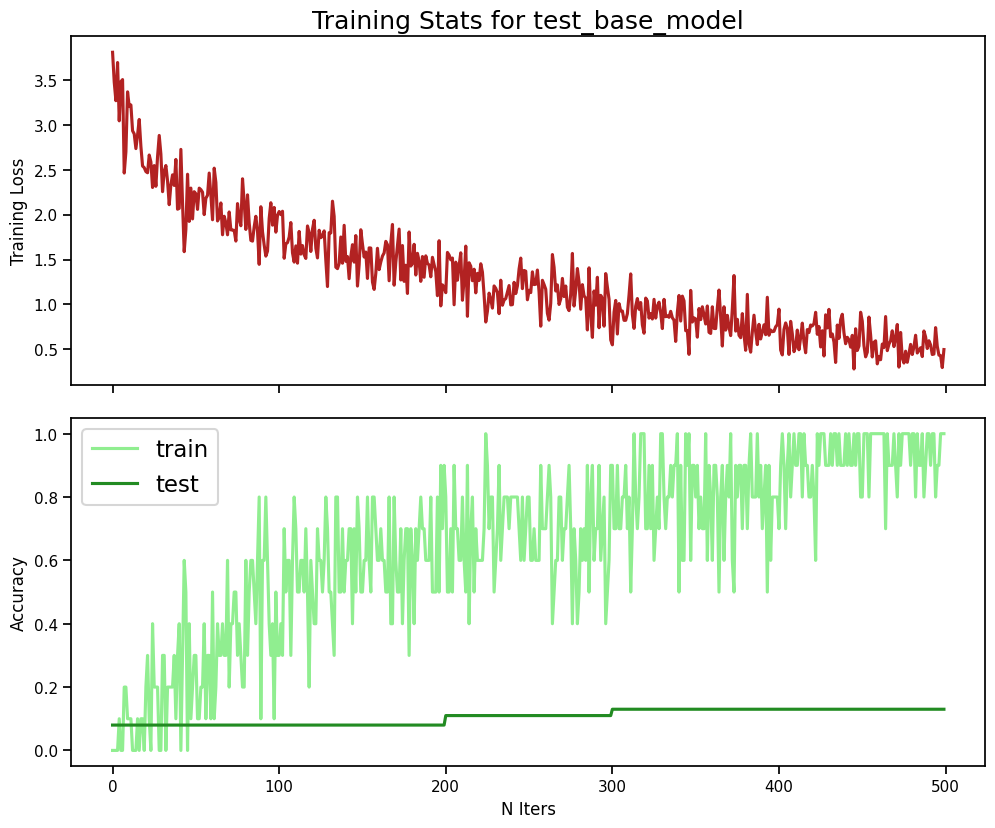

In [13]:
trained_model, loss, accuracy, test_accuracy, time = train_custom(
    model,
    X_train_tiny, 
    y_train_tiny, 
    params, 
    numIters
    )